# Stablo odlučivanja

In [1]:
# Import potrebnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Učitavanje podataka

In [2]:
# Ucitati podatke iz foldera data
df = pd.read_csv("./data/carseats.csv")

## Pregled podataka

In [3]:
# Prikaži prvih nekoliko redova
print("Prvih nekoliko redova:")
display(df.head())

# Proveri osnovne informacije i tipove podataka
print("Info o kolonama:")
df.info()

# Proveri deskriptivnu statistiku
print("Statistika:")
display(df.describe())

# Prikaži raspodelu vrednosti promenljive 'Sales'
print(df['Sales'].describe())

Prvih nekoliko redova:


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Info o kolonama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
Statistika:


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64


## Kreiranje izlazne promenljive i priprema podataka

In [4]:
# Izračunaj treći kvartil za promenljivu 'Sales'
sales_3Q = df['Sales'].quantile(0.75)
print(sales_3Q)

9.32


In [5]:
# Kreiraj izlaznu promenljivu 'HighSales' na osnovu vrednosti promenljive 'Sales'
df['HighSales'] = np.where(df['Sales'] > sales_3Q, 'Yes', 'No')
df['HighSales'].head(6)

0    Yes
1    Yes
2    Yes
3     No
4     No
5    Yes
Name: HighSales, dtype: object

In [6]:
# Ukloni 'Sales' jer je korišćena za pravljenje izlazne promenljive
df.drop(columns=['Sales'], inplace=True)

In [7]:
# Transformacija kategorijskih promenljivih u numeričke vrednosti:
# - Binarne kolone 'Urban', 'US' i 'HighSales' mapirane su na 0 (No) i 1 (Yes)
# - Ordinalna kolona 'ShelveLoc' mapirana je na 0 (Bad), 1 (Medium), 2 (Good)
df['HighSales'] = df['HighSales'].map({'Yes': 1, 'No': 0})
df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad': 0,'Medium':1,'Good':2})

In [8]:
# Prikazati distribuciju varijable 'HighSales'
print(df['HighSales'].value_counts())
print(df['HighSales'].value_counts(normalize=True))

HighSales
0    301
1     99
Name: count, dtype: int64
HighSales
0    0.7525
1    0.2475
Name: proportion, dtype: float64


## Podela na trening i test skupove

In [9]:
from sklearn.model_selection import train_test_split

# Podeli podatke na trening (80%) i test (20%) skup
X = df.drop(columns='HighSales')
y = df['HighSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prikazi raspodelu klasa u trening i test skupu
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

HighSales
0    0.753125
1    0.246875
Name: proportion, dtype: float64
HighSales
0    0.75
1    0.25
Name: proportion, dtype: float64


## Kreiranje prediktivnog modela pomoću stabla odlučivanja

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Inicijalizuj i treniraj model stabla odlučivanja
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


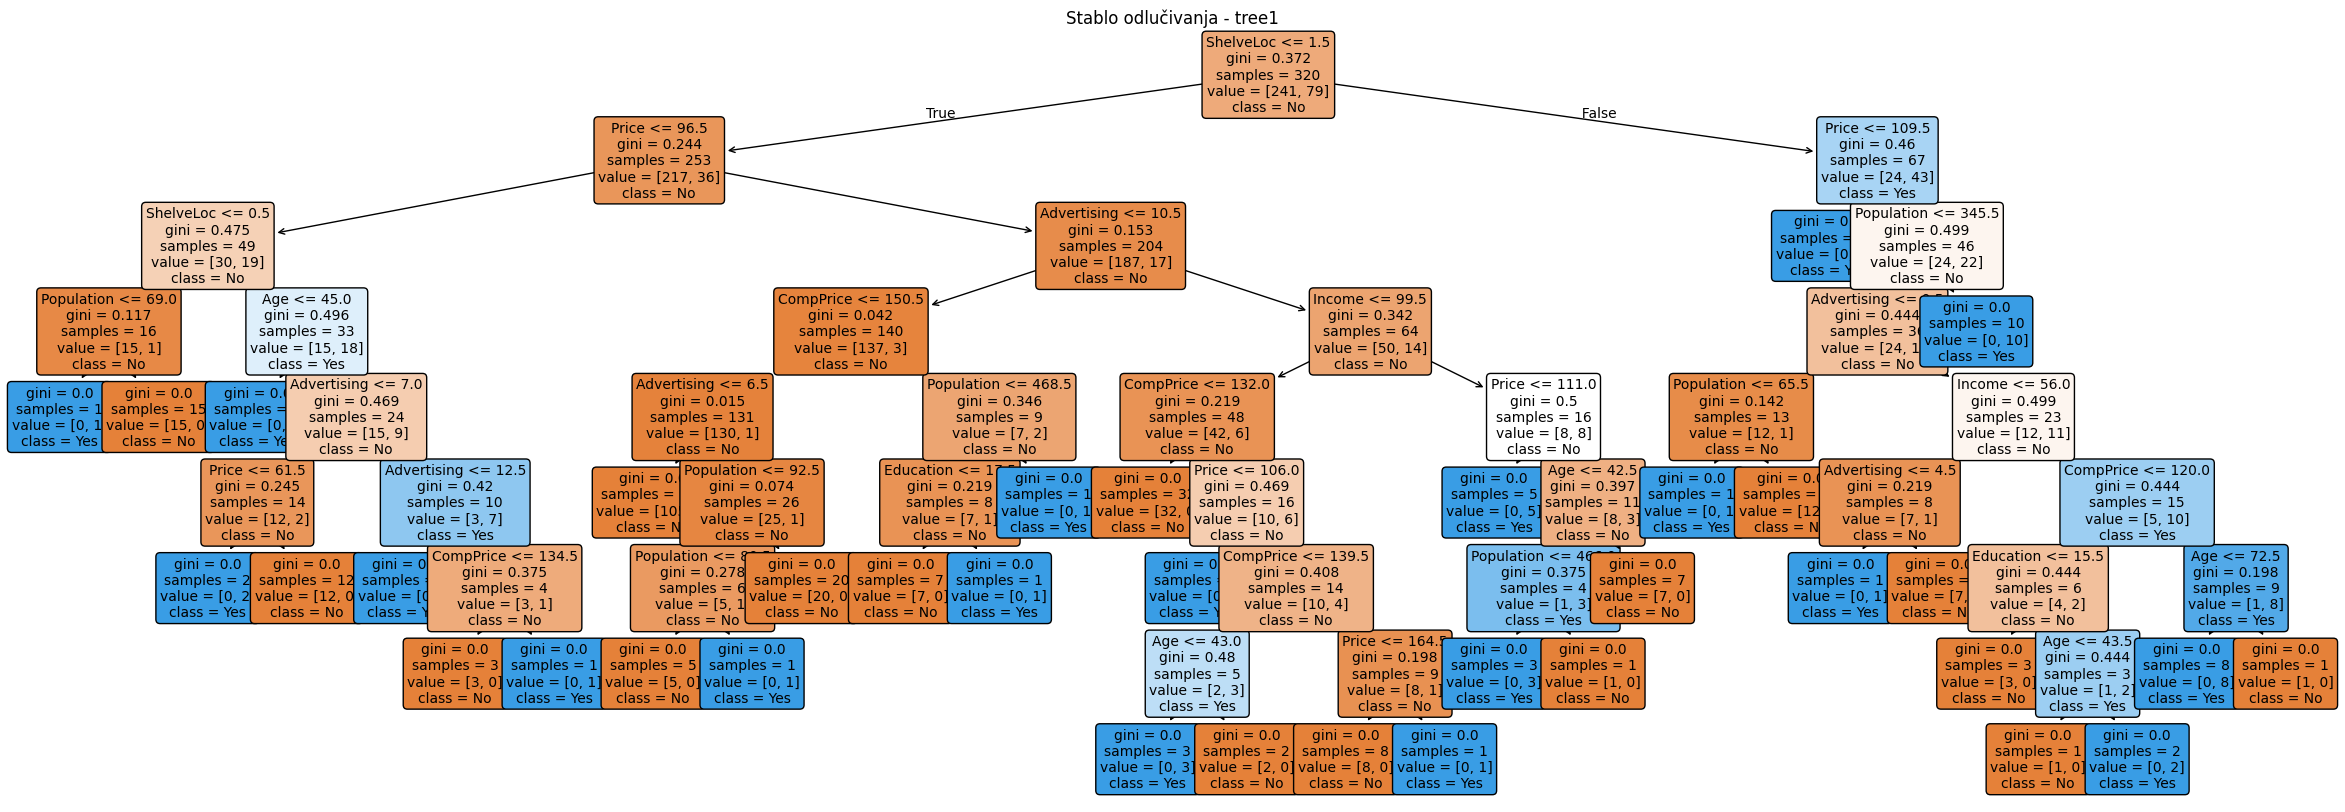

In [11]:
from sklearn.tree import plot_tree

# Vizualizacija stabla odlučivanja
plt.figure(figsize=[30,10])
plot_tree(tree1,
          feature_names=X_train.columns,
          class_names=['No','Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Stablo odlučivanja - tree1")
plt.show()

## Kreiranje predikcija i prikaz rezultata

In [12]:
# Kreiraj predikcije za test skup
y_pred1 = tree1.predict(X_test)

In [13]:
from sklearn.metrics import  confusion_matrix

# Kreiraj matricu konfuzije za predikcije modela tree1
cm1 = confusion_matrix(y_test, y_pred1)

# Prikaži matricu
print("Matrica kofuzije:")
print(cm1)

# Kreiraj DataFrame sa oznakama redova i kolona
cm1_df1 = pd.DataFrame(cm1,
                       index = ['Stvarno:No','Stvarno:Yes'],
                       columns = ['Predviđeno:No','Predviđeno:Yes'])
print(cm1_df1)

Matrica kofuzije:
[[53  7]
 [ 8 12]]
             Predviđeno:No  Predviđeno:Yes
Stvarno:No              53               7
Stvarno:Yes              8              12


In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Funkcija za izračunavanje evaluacionih metrika
def compute_eval_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,pos_label=0)
    recall = recall_score(y_true, y_pred,pos_label=0)
    f1 = f1_score(y_true, y_pred,pos_label=0)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [15]:
# Izračunaj evaluacione metrike za predikcije modela tree1
tree1.eval = compute_eval_metrics(y_test, y_pred1)
print(tree1.eval)

{'accuracy': 0.8125, 'precision': 0.8688524590163934, 'recall': 0.8833333333333333, 'f1': 0.8760330578512396}


## Izračunavanje optimalne vrednosti parametra ccp_alpha

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Definiši 10-fold stratifikovanu kros-validaciju
cv  = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Definiši opseg vrednosti za ccp_alpha parametar
param_grid = {'ccp_alpha':np.arange(0.0,0.05,0.0025)}

# Kreiraj GridSearchCV sa DecisionTreeClassifier
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid=param_grid,
                    cv=cv,
                    scoring='accuracy')

# Pokreni GridSearchCV
grid.fit(X_train, y_train)

# Izvuci najbolju vrednost za ccp_alpha
best_ccp_alpha = grid.best_params_['ccp_alpha']
print("Najbolja vrednost ccp_alpha:",best_ccp_alpha)

Najbolja vrednost ccp_alpha: 0.005


## Kreiranje tree2

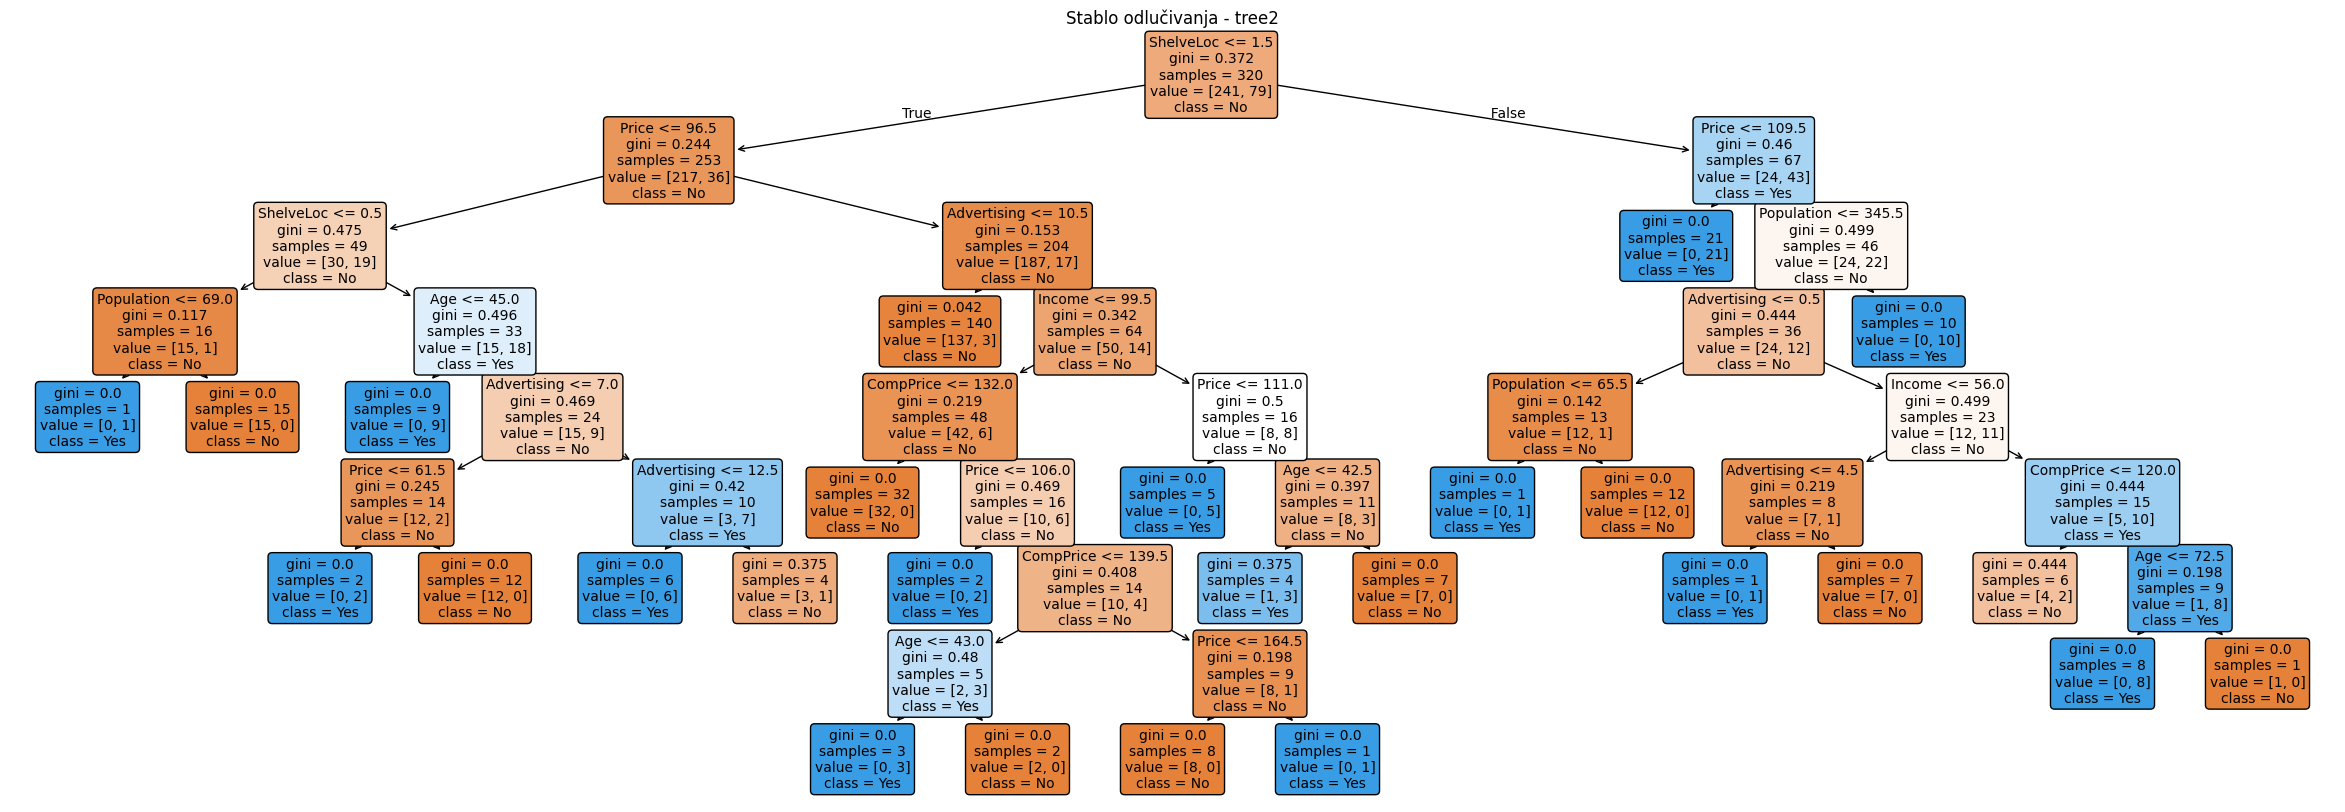

In [17]:
# Kreiraj model tree2 koristeći dobijenu vrednost za parametar ccp_alpha
tree2 = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha,random_state=42)
tree2.fit(X_train, y_train)

# Vizualizacija stabla odlučivanja
plt.figure(figsize=[30,10])
plot_tree(tree2,
          feature_names=X_train.columns,
          class_names=['No','Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Stablo odlučivanja - tree2")
plt.show()

In [18]:
# Kreiraj predikcije za test skup za tree2
y_pred2 = tree2.predict(X_test)

In [19]:
# Kreiraj matricu konfuzije za predikcije modela tree2
cm2 = confusion_matrix(y_test, y_pred2)

# Prikaži matricu
print("Matrica kofuzije:")
print(cm2)

# Kreiraj DataFrame sa oznakama redova i kolona
cm2_df = pd.DataFrame(cm2,
                       index = ['Stvarno:No','Stvarno:Yes'],
                       columns = ['Predviđeno:No','Predviđeno:Yes'])
print(cm2_df)

Matrica kofuzije:
[[54  6]
 [ 8 12]]
             Predviđeno:No  Predviđeno:Yes
Stvarno:No              54               6
Stvarno:Yes              8              12


In [20]:
# Izračunaj evaluacione metrike za predikcije modela tree2
tree2_eval = compute_eval_metrics(y_test, y_pred2)
print(tree2_eval)

{'accuracy': 0.825, 'precision': 0.8709677419354839, 'recall': 0.9, 'f1': 0.8852459016393442}


In [21]:
# Uporedi evaluacione metrike za predikcije modela tree1 i tree2
eval_df = pd.DataFrame([tree1.eval,tree2_eval],index=['Tree1','Tree2'])
print(eval_df)

       accuracy  precision    recall        f1
Tree1    0.8125   0.868852  0.883333  0.876033
Tree2    0.8250   0.870968  0.900000  0.885246
